# Bank Marketing - Customer Segmentation

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


https://www.kaggle.com/berkayalan/bank-marketing-data-set

In [142]:
bank = pd.read_csv("datasets/bank_marketing_dataset.csv")
bank.shape

(41188, 21)

In [143]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [144]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [145]:
print(bank.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object


In [146]:
# Check for null values
bank.isnull().sum().sum()

0

In [147]:
# Drop features not interested in
bank_new = bank[["age","job","marital","education","default","housing","loan","contact","subscribed"]]
bank_new.head()

,age,job,marital,education,default,housing,loan,contact,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,no
1,57,services,married,high.school,unknown,no,no,telephone,no
2,37,services,married,high.school,no,yes,no,telephone,no
3,40,admin.,married,basic.6y,no,no,no,telephone,no
4,56,services,married,high.school,no,no,yes,telephone,no


In [148]:
print("Unique values in each categorical column:")
for col in bank_new.select_dtypes(include=[object]):
    print(col,":", bank_new[col].unique())

Unique values in each categorical column:
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
subscribed : ['no' 'yes']


1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
21 - subscribed : has the client subscribed a term deposit? (binary: 'yes','no')

## Visualisation

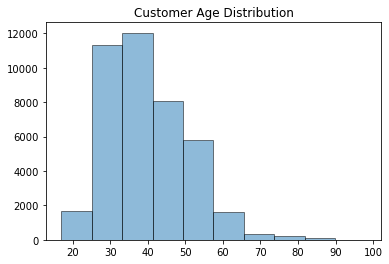

In [149]:
plt.hist(bank_new["age"], alpha = 0.5, ec = "k")
plt.title("Customer Age Distribution")
plt.show()

In [150]:
bank_new.skew()

age    0.784697
dtype: float64

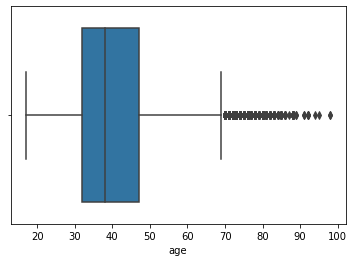

In [151]:
sns.boxplot(x = bank_new["age"])
plt.show()

In [152]:
bank_new.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


Most customers are between 25 and 42 years of age. Small positive skew to the data. Average age of 40, maximum age of 98 and minimum age of 17.

In [153]:
def dist(data, y):
    sns.countplot(y = y, data = data, order = data[y].value_counts().index)
    plt.show()

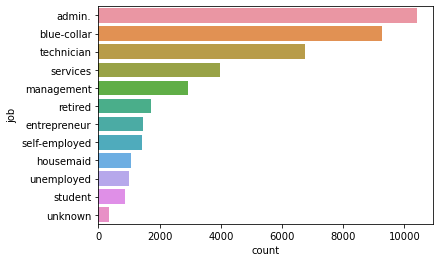

In [154]:
dist(bank_new,"job")

Most customers are employed in administration or blue-collar occupations

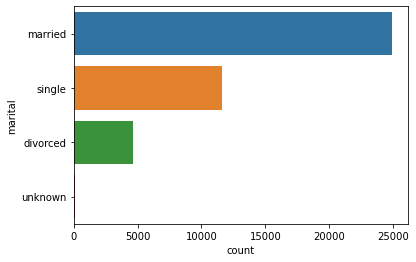

In [155]:
dist(bank_new,"marital")

Most customers are married

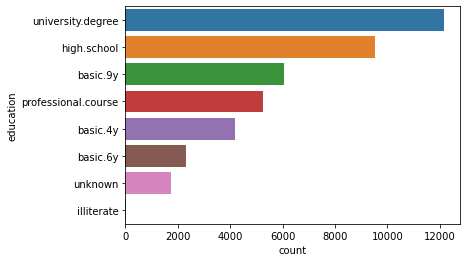

In [156]:
dist(bank_new,"education")

Most customers have a university degree or high school education

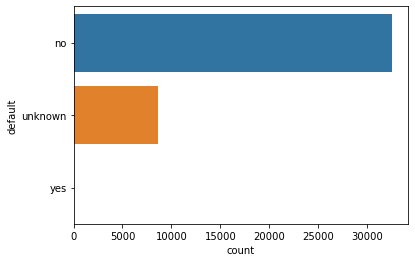

In [157]:
dist(bank_new,"default")

Most customers have not defauted

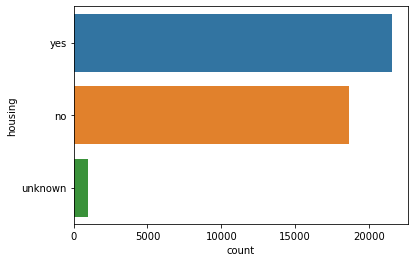

In [158]:
dist(bank_new,"housing")

Most customers have a housing loan

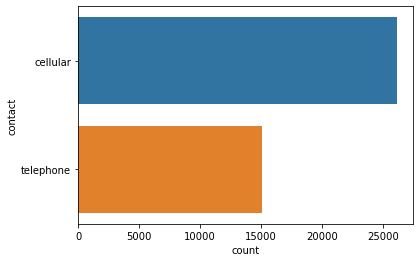

In [159]:
dist(bank_new, "contact")

Most customers are contacted by mobile

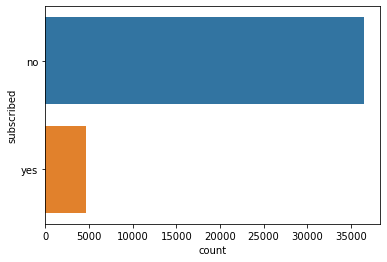

In [160]:
dist(bank_new, "subscribed")

Most customers have not subscribed to a term deposit

## Preprocessing

In [161]:
# Replace unknown with nan and drop unknown values from dataframe
bank_new = bank_new.replace("unknown",np.nan)
bank_new = bank_new.dropna()

In [162]:
print("Unique values in each categorical column:")
for col in bank_new.select_dtypes(include=[object]):
    print(col,":", bank_new[col].unique())

Unique values in each categorical column:
job : ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
subscribed : ['no' 'yes']


In [163]:
bank_new.shape

(30488, 9)

In [164]:
# Convert the "yes","no" columns to binary
columns = ["default","housing","loan","subscribed"]
for col in columns:
    bank_new[col] = bank_new[col].apply(lambda x: 0 if x=='no' else 1)

In [165]:
# Convert contact column to binary label
bank_new["contact"] = bank_new["contact"].apply(lambda x: 0 if x =="telephone" else 1)

In [166]:
# Create dummies for job and marital columns
data = pd.get_dummies(bank_new, columns=['job','marital'])
data.head()

,age,education,default,housing,loan,contact,subscribed,job_admin.,job_blue-collar,job_entrepreneur,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,basic.4y,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,high.school,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,basic.6y,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,high.school,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,professional.course,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [168]:
education_mapper = {"illiterate":1,"basic.6y":2,"basic.4y":3,"basic.9y":4,"professional.course":5,"high.school":6,
                    "university.degree":7}
data["education"] = data["education"].replace(education_mapper)

In [169]:
scaler = StandardScaler()
standard = pd.DataFrame(scaler.fit_transform(data[["age"]]))

In [170]:
standard.describe()

,0
count,3.048800e+04
mean,7.150029e-16
std,1.000016e+00
min,-2.131931e+00
25%,-7.770959e-01
50%,-1.964523e-01
75%,5.777393e-01
max,5.416437e+00


In [171]:
data.head()

,age,education,default,housing,loan,contact,subscribed,job_admin.,job_blue-collar,job_entrepreneur,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,6,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,6,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## K Means Clustering

In [172]:
# Set clusters in parameter grid
parameters = {'n_clusters': [2, 3, 4, 5, 6,7,8]}
parameter_grid = ParameterGrid(parameters)

# Initialize the best score to -1 as the value to beat with the model
best_score = -1
model = KMeans()

In [173]:
# Run through the values (** unpacks dictionary values to another dictionary)
for g in parameter_grid:
    model.set_params(**g)
    model.fit(data)

    ss = metrics.silhouette_score(data, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.5812718536622473
Parameter:  {'n_clusters': 3} Score:  0.47108576605625324
Parameter:  {'n_clusters': 4} Score:  0.45533794380888226
Parameter:  {'n_clusters': 5} Score:  0.40769214826333944
Parameter:  {'n_clusters': 6} Score:  0.3676781557894636
Parameter:  {'n_clusters': 7} Score:  0.34383280469381045
Parameter:  {'n_clusters': 8} Score:  0.3197411674981802


In [174]:
best_grid

{'n_clusters': 2}

In [175]:
model = KMeans(n_clusters = 2)
model.fit(data)
results = pd.DataFrame(model.labels_)

In [176]:
final = pd.concat([results,bank_new.reset_index()],axis = 1)
final.drop(columns = ["index"],axis = 1, inplace = True)
final.rename(columns={0:'Cluster'}, inplace=True)

In [177]:
final.head()

,Cluster,age,job,marital,education,default,housing,loan,contact,subscribed
0,1,56,housemaid,married,basic.4y,0,0,0,0,0
1,0,37,services,married,high.school,0,1,0,0,0
2,0,40,admin.,married,basic.6y,0,0,0,0,0
3,1,56,services,married,high.school,0,0,1,0,0
4,1,59,admin.,married,professional.course,0,0,0,0,0


In [183]:
cluster_one = final[final["Cluster"]==0]
cluster_one.shape

(20832, 10)

In [184]:
cluster_two = final[final["Cluster"]==1]
cluster_two.shape

(9656, 10)